In [ ]:
import numpy as np
import torch

def patch_images(tensor: torch.tensor, patch_size: tuple):
  assert tensor.dim() == 3, "Support for only 3D tensors"

  listx = []
  for image in tensor:
    x = 0
    y = 0
    for i in range(tensor.shape[-2]-patch_size[0]+1):
      for j in range(tensor.shape[-1]-patch_size[1]+1):
        listx.append(image[x:x+patch_size[0],y:y+patch_size[1]])
        y += 1
      x += 1
      y = 0

  listx = [x for x in listx if x.shape == patch_size]

  torchx = torch.from_numpy(np.array(listx))
  return torch.reshape(torchx, (torchx.shape[0]//tensor.shape[0], tensor.shape[0], torchx.shape[-2], torchx.shape[-1]))

In [ ]:
def upsample_patches(tensor:torch.tensor, upsample_size: tuple, with_bias=True):

  sample = 1/(tensor.shape[0]*upsample_size[0]*upsample_size[-1])
  weights = torch.from_numpy(np.random.uniform(low=-sample**.5, high=sample**.5, size=upsample_size))
  bias = torch.from_numpy(np.random.uniform(low=-sample**.5, high=sample**.5, size=(tensor.shape[0]))) if with_bias else 0

  x = []
  for i in range(tensor.shape[0]):
    y,z = 0,0
    for j in range(tensor.shape[-2]):
      for k in range(tensor.shape[-1]):
        x.append(torch.squeeze(weights*tensor[i,j,k]+bias[i]))

  extract = torch.cat(tensors=tuple([p for p in x[:]]), axis=-1)
  extract = torch.reshape(extract, (3,tensor.shape[1]*upsample_size[0],tensor.shape[2]*upsample_size[-1]))
  return extract

In [ ]:
import cv2
path = str('/content/RNNvTRANS.png')
img = cv2.imread(path)

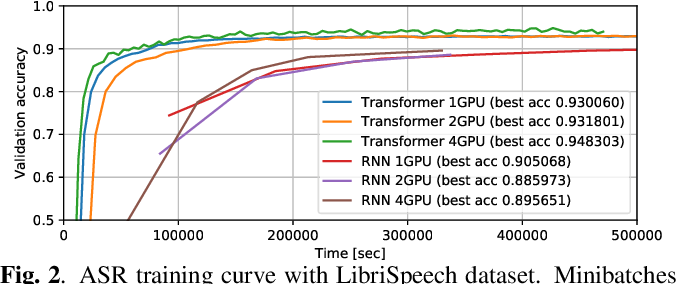

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [ ]:
img_ = torch.tensor(img)
img_ = torch.movedim(img_, (2,0), (0,2))
output = upsample_patches(img_, (3,3))

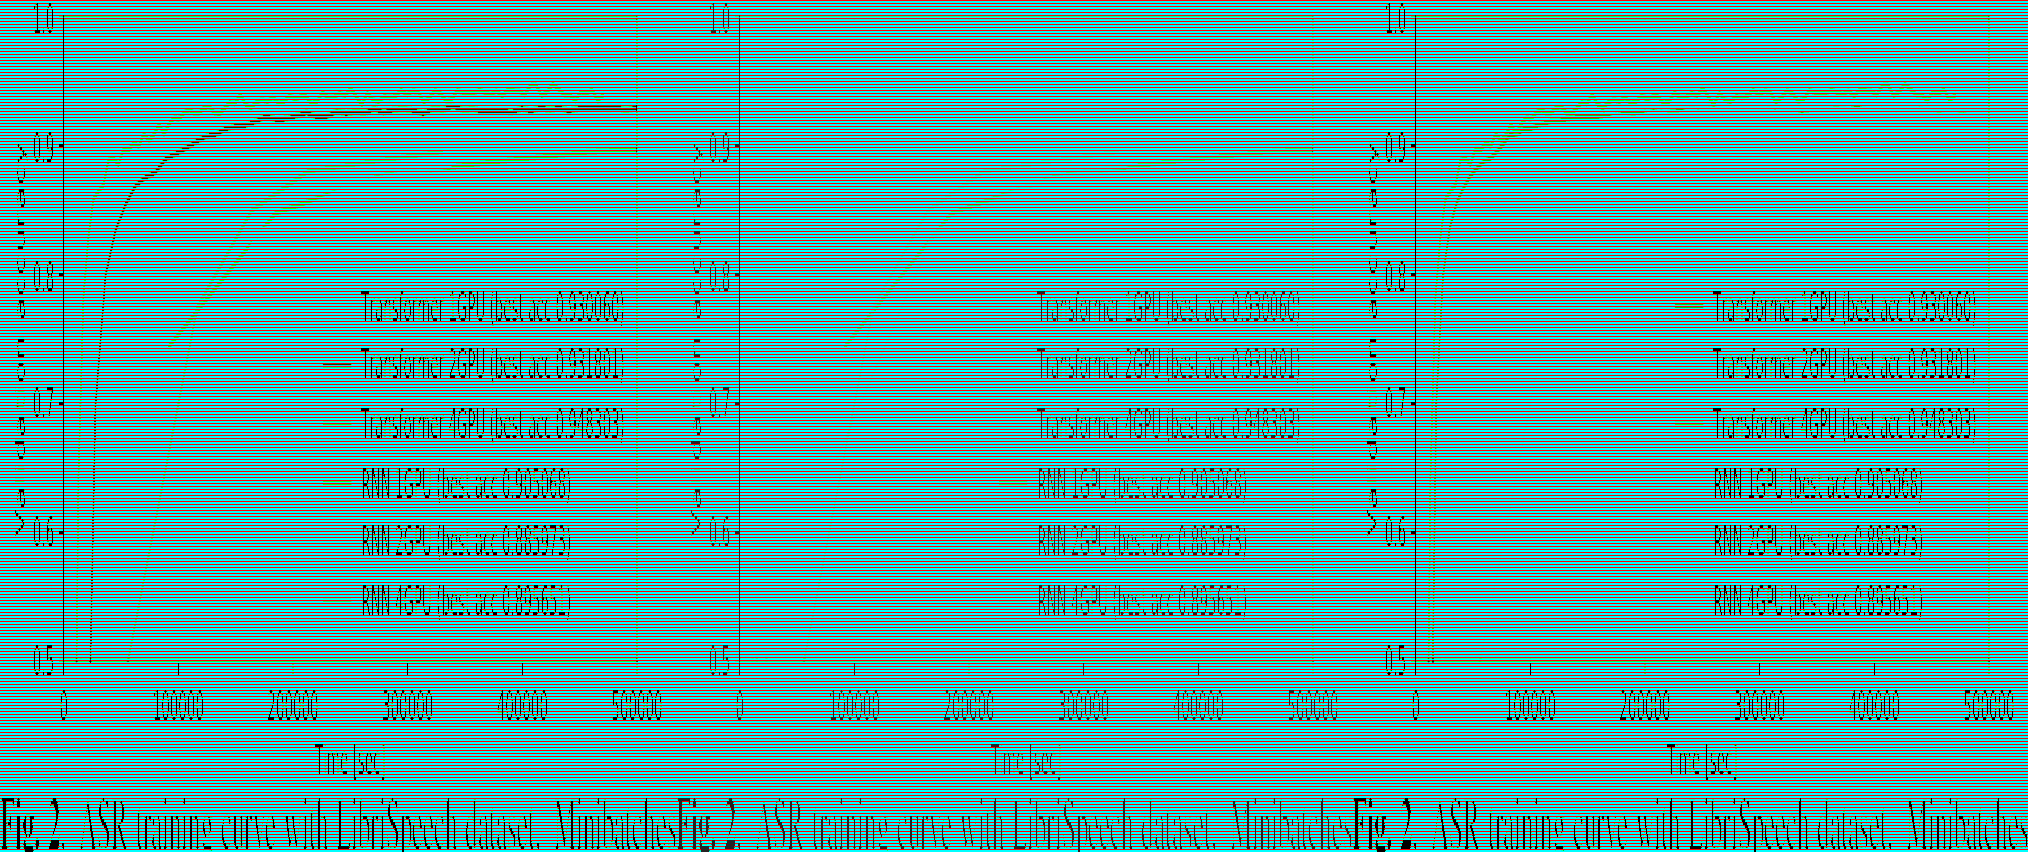

In [ ]:
o = torch.movedim(output, (0,2), (2,0))
cv2_imshow(o.numpy()*255.)